In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df = pd.read_parquet('../OUTPUT/evictions_matched.parquet')

In [189]:
df.shape

(1099864, 83)

In [ ]:
## Set your desired match confidence here
confidence = 90
df = df.loc[df['match_confidence'] >= confidence]

In [ ]:
df.head()

,plaintiff_name,defendant_name,defendant_zip,c2dp_case_id,county,fips,case_number,filed_date,case_type,debt_type,...,RA-Status,RA-Loc,StockInd,TotalShares,MergerInd,AssessInd,Is Series LLC,Is Protected Series,Series LLC ID,Name_normalized
0,"1 HIL MAR, INC","SCHOTT, HENRY J",23227.0,127_GV22000423-00,New Kent General District Court,127,GV22000423-00,2022-08-18,Unlawful Detainer,None,...,Active,87.0,NaN,NaN,None,1.0,None,None,None,ar
1,"1 HIL MAR, INC","SCHOTT, HENRY J",23227.0,127_GV22000423-00,New Kent General District Court,127,GV22000423-00,2022-08-18,Unlawful Detainer,None,...,Active,153.0,NaN,NaN,None,1.0,None,None,None,ar
2,"1 HIL MAR, INC","SCHOTT, HENRY J",23227.0,127_GV22000423-00,New Kent General District Court,127,GV22000423-00,2022-08-18,Unlawful Detainer,None,...,Active,107.0,NaN,NaN,None,1.0,None,None,None,ar
3,"1 HIL MAR, INC","SCHOTT, HENRY J",23227.0,127_GV22000423-00,New Kent General District Court,127,GV22000423-00,2022-08-18,Unlawful Detainer,None,...,Active,600.0,NaN,NaN,None,1.0,None,None,None,ar
4,1 SQ APTS LP,AYALA ERICA,23702.0,740_GV18012249-00,Portsmouth General District Court,740,GV18012249-00,2018-11-21,Unlawful Detainer,None,...,None,NaN,NaN,NaN,None,1.0,None,None,None,ap


In [ ]:
df.shape

(1092439, 83)

In [ ]:
df.columns

Index(['plaintiff_name', 'defendant_name', 'defendant_zip', 'c2dp_case_id',
       'county', 'fips', 'case_number', 'filed_date', 'case_type', 'debt_type',
       'defendant_attorney', 'defendant_dba_ta', 'defendant_address',
       'defendant_count', 'all_defendant_names', 'all_defendant_addresses',
       'defendant_order_validation', 'hearing_count', 'disposition_date',
       'disposition', 'judgment', 'homestead_exemption_waived',
       'is_judgment_satisfied', 'date_satisfaction_filed',
       'further_case_information', 'costs', 'attorney_fees',
       'principal_amount', 'interest_award', 'possession',
       'writ_of_eviction_issued_date', 'other_amount', 'other_awarded',
       'clean_party_name', 'plaintiff_attorney', 'plaintiff_dba_ta',
       'plaintiff_address', 'plaintiff_count', 'all_plaintiff_names',
       'all_plaintiff_addresses', 'plaintiff_order_validation', 'filed_year',
       'filed_quarter', 'plaintiff_zip', 'serial_filing',
       'latest_filing_in_serial_wi

In [ ]:
# ### Heuristic Matching
# # Group by Registered Agent (RA-Name)
# ra_groups = df.groupby('RA-Name').size().reset_index(name='LLC_Count')
# ra_groups = ra_groups.sort_values(by='LLC_Count', ascending=False)

# # Group by Address (Street1)
# address_groups = df.groupby('Street1').size().reset_index(name='LLC_Count')
# address_groups = address_groups.sort_values(by='LLC_Count', ascending=False)

# # Group by composite key: RA-Name + Street1
# df['Composite_Key'] = df['RA-Name'] + '|' + df['Street1']
# composite_groups = df.groupby('Composite_Key').size().reset_index(name='LLC_Count')
# composite_groups = composite_groups.sort_values(by='LLC_Count', ascending=False)

In [ ]:
# print("Top groups by Registered Agent:")
# print(ra_groups.head(10))

In [ ]:
# print("Top groups by Street1:")
# print(address_groups.head(10))

In [ ]:
# print("Top groups by Composite Key:")
# print(composite_groups.head(10))

A more robust approach

In [ ]:
df.columns

Index(['plaintiff_name', 'defendant_name', 'defendant_zip', 'c2dp_case_id',
       'county', 'fips', 'case_number', 'filed_date', 'case_type', 'debt_type',
       'defendant_attorney', 'defendant_dba_ta', 'defendant_address',
       'defendant_count', 'all_defendant_names', 'all_defendant_addresses',
       'defendant_order_validation', 'hearing_count', 'disposition_date',
       'disposition', 'judgment', 'homestead_exemption_waived',
       'is_judgment_satisfied', 'date_satisfaction_filed',
       'further_case_information', 'costs', 'attorney_fees',
       'principal_amount', 'interest_award', 'possession',
       'writ_of_eviction_issued_date', 'other_amount', 'other_awarded',
       'clean_party_name', 'plaintiff_attorney', 'plaintiff_dba_ta',
       'plaintiff_address', 'plaintiff_count', 'all_plaintiff_names',
       'all_plaintiff_addresses', 'plaintiff_order_validation', 'filed_year',
       'filed_quarter', 'plaintiff_zip', 'serial_filing',
       'latest_filing_in_serial_wi

In [ ]:
def normalize_entity(name): # Normalize any fields you want to group by here
    if pd.isna(name):
        return ''
    return name.strip().lower().replace('.', '').replace(',', '')

In [ ]:
def normalize_columns(df, columns):
    for col in columns:
        df[f'{col}_normalized'] = df[col].apply(normalize_entity)
    return df

In [ ]:
normalize_fields = ['RA-Name', 'Street1'] #normalize any fields you're using to group here
df = normalize_columns(df, normalize_fields)

Some examples of basic grouping if you want to try yourself.

In [ ]:
df.columns

Index(['plaintiff_name', 'defendant_name', 'defendant_zip', 'c2dp_case_id',
       'county', 'fips', 'case_number', 'filed_date', 'case_type', 'debt_type',
       'defendant_attorney', 'defendant_dba_ta', 'defendant_address',
       'defendant_count', 'all_defendant_names', 'all_defendant_addresses',
       'defendant_order_validation', 'hearing_count', 'disposition_date',
       'disposition', 'judgment', 'homestead_exemption_waived',
       'is_judgment_satisfied', 'date_satisfaction_filed',
       'further_case_information', 'costs', 'attorney_fees',
       'principal_amount', 'interest_award', 'possession',
       'writ_of_eviction_issued_date', 'other_amount', 'other_awarded',
       'clean_party_name', 'plaintiff_attorney', 'plaintiff_dba_ta',
       'plaintiff_address', 'plaintiff_count', 'all_plaintiff_names',
       'all_plaintiff_addresses', 'plaintiff_order_validation', 'filed_year',
       'filed_quarter', 'plaintiff_zip', 'serial_filing',
       'latest_filing_in_serial_wi

In [ ]:
ra_groups = df.groupby('RA-Name_normalized').agg({
    'Name': 'count',
    'plaintiff_name': lambda x: list(x),
    'IncorpDate': lambda x: list(x),
    'Zip': lambda x: list(x),
    'filed_date': lambda x: list(x),
    'serial_filing': lambda x: list(x)
}).rename(columns={'Name': 'LLC_Count'}).reset_index()
ra_groups = ra_groups.loc[ra_groups['LLC_Count'] > 1]

In [ ]:
address_groups = df.groupby('Street1_normalized').agg({
    'Name': 'count',
    'plaintiff_name': lambda x: list(x),
    'IncorpDate': lambda x: list(x),
    'Zip': lambda x: list(x),
    'filed_date': lambda x: list(x),
    'serial_filing': lambda x: list(x)
}).rename(columns={'Name': 'LLC_Count'}).reset_index()
address_groups = address_groups.loc[address_groups['LLC_Count'] > 1]

In [ ]:
atty_groups = df.groupby('plaintiff_attorney_normalized').agg({
    'Name':'count',
    'RA-Name': lambda x: list(x),
    'IncorpDate': lambda x: list(x),
    'Zip': lambda x: list(x),
    'filed_date': lambda x: list(x),
    'serial_filing': lambda x: list(x),
    'plaintiff_name': lambda x: list(x)
}).rename(columns={'Name':'LLC_Count'}).reset_index()
atty_groups = atty_groups.loc[atty_groups['LLC_Count'] > 1]

Create some composite keys for analysis. Here's one example, and a function to make it all easier.

In [ ]:
df['Composite_Key'] =(
    df['RA-Name'].fillna('') + '|' + df['Street1'].fillna('') + '|' + df['plaintiff_attorney_normalized'].fillna('')
)
composite_groups = df.groupby('Composite_Key').agg({
    'Name': 'count',
    'plaintiff_name': lambda x: list(x),
    'IncorpDate': lambda x: list(x),
    'Zip': lambda x: list(x),
    'filed_date': lambda x: list(x),
    'serial_filing': lambda x: list(x)
}).rename(columns={'Name': 'LLC_Count'}).reset_index()
composite_groups = composite_groups.loc[composite_groups['LLC_Count'] > 1]

In [ ]:
def create_composite_key(df, columns, key_name='Composite_Key'):
    df[key_name] = df[columns].fillna('').agg('|'.join, axis=1)
    return df, key_name

In [ ]:
df['IncorpDate'] = pd.to_datetime(df['IncorpDate'], errors='coerce')
df['filed_date'] = pd.to_datetime(df['filed_date'], errors='coerce')

In [ ]:
def analyze_llc_networks(df, composite_key):
    """
    Identify and analyze networks of created composite group.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame containing the composite key column.
    - composite_key (str): Name of the composite key column to group by (e.g., 'Composite_Key').
    
    Returns:
    - tuple: (all_groups, large_groups) where all_groups is the full analysis and large_groups is the top 20 networks.
    """
    if composite_key not in df.columns:
        raise ValueError(f"Composite key column '{composite_key}' not found in DataFrame")
    
    df = df.set_index(composite_key)

    # Group by the provided composite key
    groups = df.groupby(level=0).agg({
        'Name': 'count',
        'RA-Name': list,
        'plaintiff_name': list,
        'plaintiff_attorney': list,
        'IncorpDate': list,
        'Zip': list,
        'filed_date': list,
        'serial_filing': list
    }).rename(columns={'Name': 'LLC_Count'}).reset_index()

    # Filter for groups with more than one LLC
    groups = groups.loc[groups['LLC_Count'] > 1]

    # Enrich with timespan and serial filer stats
    def parse_dates(dates):
        return [d for d in dates if pd.notna(d)]

    groups['Timespan_Days'] = groups['IncorpDate'].apply(
        lambda dates: (max(dates) - min(dates)).days if len(dates) > 1 else 0
    )

    groups['Filing_Timespan_Days'] = groups['filed_date'].apply(
        lambda dates: (max(dates) - min(dates)).days if len(dates) > 1 else 0
    )

    groups['Serial_Filer_Count'] = groups['serial_filing'].apply(
        lambda x: sum(filing is True for filing in x)
    )

    groups['Serial_Filer_Pct'] = groups['Serial_Filer_Count'] / groups['LLC_Count']

    # Sort for biggest networks and get top 20
    large_groups = groups.sort_values('LLC_Count', ascending=False).head(20)

    return groups, large_groups

Now we can dynamically include different fields in the grouping strategy. Make sure that all fields in the 'fields' list are normalized as seen above.

In [ ]:
#Dynamic analysis! See example usage
fields = ['RA-Name_normalized', 'Street1_normalized', 'plaintiff_attorney_normalized']
df, composite_key = create_composite_key(df, fields)

In [ ]:
groups, large_groups = analyze_llc_networks(df, composite_key)

In [193]:
print("=== Summary Statistics ===")
key_metrics = ['LLC_Count', 'Timespan_Days', 'Filing_Timespan_Days', 'Serial_Filer_Pct']
print(groups[key_metrics].describe())

=== Summary Statistics ===
          LLC_Count  Timespan_Days  Filing_Timespan_Days  Serial_Filer_Pct
count  23168.000000   23168.000000          23168.000000      23168.000000
mean      46.371849      66.018258            624.893517          0.288232
std      197.154372     481.852137            708.306742          0.269609
min        2.000000       0.000000              0.000000          0.000000
25%        3.000000       0.000000             28.000000          0.000000
50%        6.000000       0.000000            324.000000          0.262453
75%       24.000000       0.000000           1039.250000          0.500000
max     5076.000000    8952.000000           2246.000000          1.000000


In [194]:
print("\nTotal number of composite groups:", len(groups))
print("Number of groups with serial filers:", len(groups[groups['Serial_Filer_Count'] > 0]))
print("Top 5 largest groups by LLC count:")
print(groups[[composite_key, 'LLC_Count']].sort_values('LLC_Count', ascending=False).head())


Total number of composite groups: 23168
Number of groups with serial filers: 15490
Top 5 largest groups by LLC count:
                                           Composite_Key  LLC_Count
40916                |6031 connection dr ste 200|solodar       5076
6549   carl a   eason|2593 mulch landing rd|dankos go...       4223
23180     kerry a   sheridan|402 n main st|dankos gordon       4223
40917        |6031 connection dr ste 200|solodar solodar       3692
2333   arvind b   amin|208 golden maple dr|solodar so...       3281


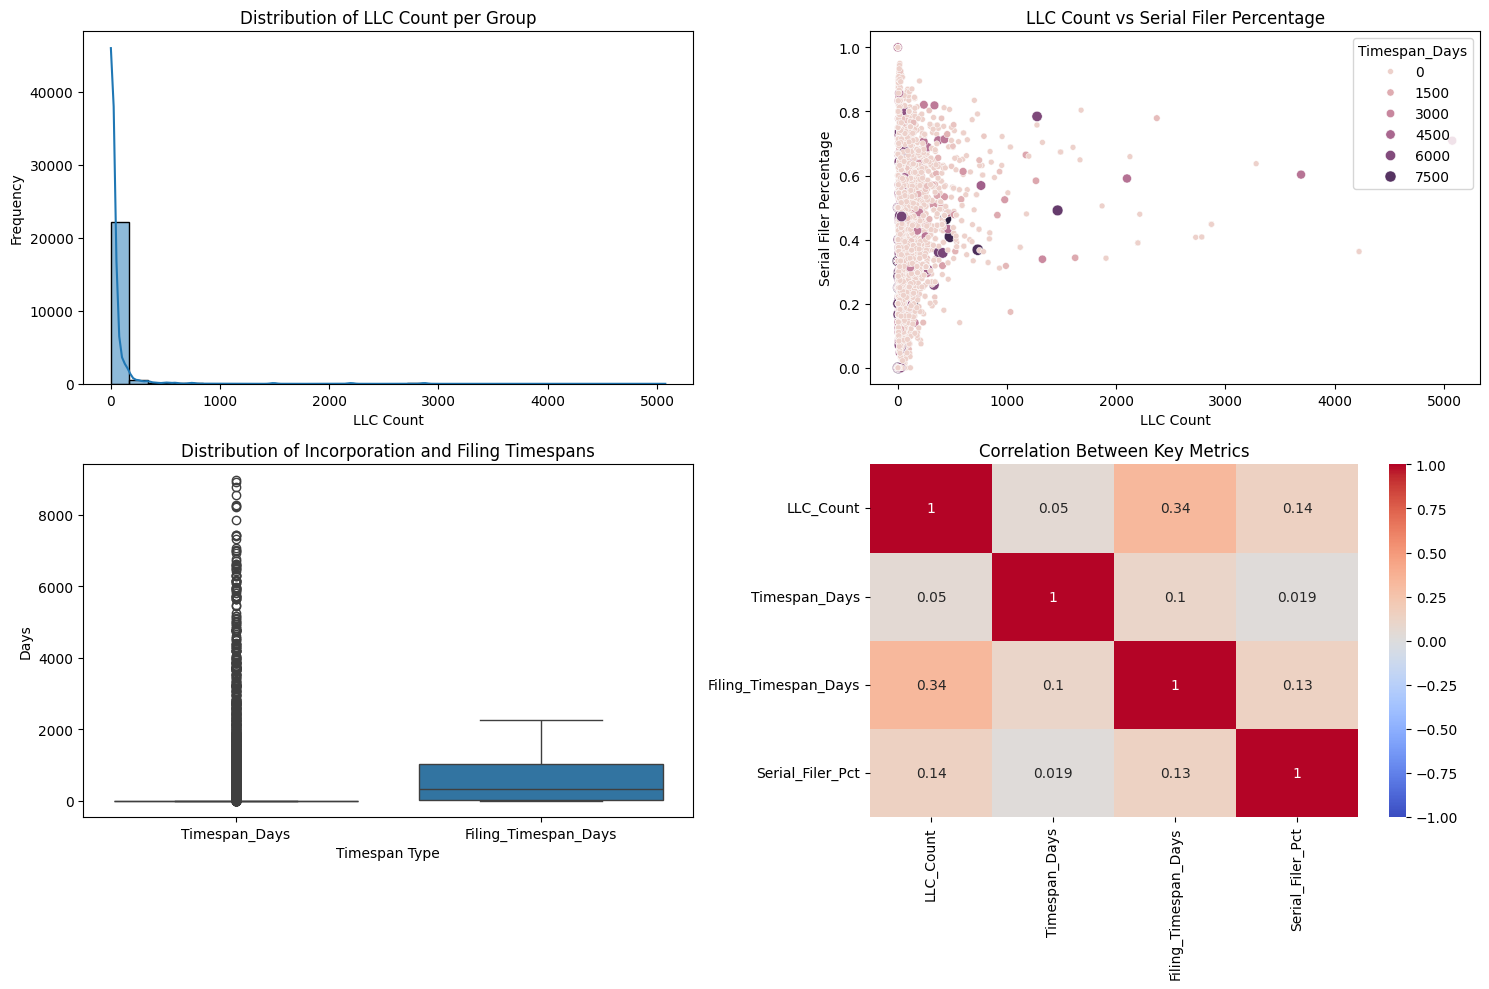

In [196]:
plt.figure(figsize=(15, 10))

# 2.1 Histogram of LLC Count
plt.subplot(2, 2, 1)
sns.histplot(groups['LLC_Count'], bins=30, kde=True)
plt.title('Distribution of LLC Count per Group')
plt.xlabel('LLC Count')
plt.ylabel('Frequency')

# 2.2 Scatter plot: LLC Count vs Serial Filer Percentage
plt.subplot(2, 2, 2)
sns.scatterplot(data=groups, x='LLC_Count', y='Serial_Filer_Pct', size='Timespan_Days', hue='Timespan_Days')
plt.title('LLC Count vs Serial Filer Percentage')
plt.xlabel('LLC Count')
plt.ylabel('Serial Filer Percentage')

# 2.3 Box plot of Timespan Days
plt.subplot(2, 2, 3)
sns.boxplot(data=groups[['Timespan_Days', 'Filing_Timespan_Days']].melt(), x='variable', y='value')
plt.title('Distribution of Incorporation and Filing Timespans')
plt.xlabel('Timespan Type')
plt.ylabel('Days')

# 2.4 Correlation heatmap
plt.subplot(2, 2, 4)
corr = groups[key_metrics].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Key Metrics')

plt.tight_layout()
plt.show()
plt.savefig('composite_groups_eda.png')
plt.close()

In [197]:
# 3. Key Insights
print("\n=== Key Insights ===")
# Largest networks
largest_network = groups.loc[groups['LLC_Count'].idxmax()]
print(f"Largest network ({largest_network[composite_key]}) has {largest_network['LLC_Count']} LLCs.")

# Serial filer prevalence
high_serial_groups = groups[groups['Serial_Filer_Pct'] > 0.5]
print(f"Number of groups with >50% serial filers: {len(high_serial_groups)}")

# Temporal patterns
long_timespan = groups[groups['Timespan_Days'] > groups['Timespan_Days'].quantile(0.75)]
print(f"Number of groups with incorporation timespan above 75th percentile: {len(long_timespan)}")

# Example of a group with high serial filing
if not high_serial_groups.empty:
    example_group = high_serial_groups.iloc[0]
    print("\nExample group with high serial filing:")
    print(f"- Composite Key: {example_group[composite_key]}")
    print(f"- LLC Count: {example_group['LLC_Count']}")
    print(f"- Serial Filer Percentage: {example_group['Serial_Filer_Pct']:.2%}")
    print(f"- Registered Agents: {example_group['RA-Name'][:5]}")  # Show first 5 for brevity


=== Key Insights ===
Largest network (|6031 connection dr ste 200|solodar) has 5076 LLCs.
Number of groups with >50% serial filers: 4382
Number of groups with incorporation timespan above 75th percentile: 978

Example group with high serial filing:
- Composite Key: 7820 whitepine  llc|6501 goldleaf dr|selfrepresented
- LLC Count: 3
- Serial Filer Percentage: 66.67%
- Registered Agents: ['7820 Whitepine  LLC', '7820 Whitepine  LLC', '7820 Whitepine  LLC']


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import networkx as nx
# import plotly.express as px
# import numpy as np
# from sklearn.ensemble import IsolationForest
# from collections import Counter
# import re

# def advanced_eda_composite_groups(groups, composite_key='Composite_Key'):
#     """
#     Perform advanced exploratory data analysis on composite groups from analyze_llc_networks.
    
#     Parameters:
#     - groups (pd.DataFrame): DataFrame containing grouped LLC network data.
#     - composite_key (str): Name of the composite key column (default: 'Composite_Key').
    
#     Returns:
#     - None: Outputs analyses, visualizations, and insights to console and files.
#     """
#     # Set plot style
#     sns.set(style="whitegrid")
    
#     # 1. Network Analysis: Build and Analyze LLC Network Graph
#     print("=== Network Analysis ===")
#     G = nx.Graph()
#     for _, row in groups.iterrows():
#         group_id = row[composite_key]
#         ra_names = row['RA-Name']
#         for ra in set(ra_names):  # Connect groups sharing registered agents
#             G.add_node(group_id, llc_count=row['LLC_Count'], type='group')
#             G.add_node(ra, type='ra')
#             G.add_edge(group_id, ra, weight=1)
    
#     # Compute network metrics
#     degree_centrality = nx.degree_centrality(G)
#     clustering_coeff = nx.clustering(G)
#     largest_cc = max(nx.connected_components(G), key=len)
#     largest_cc_subgraph = G.subgraph(largest_cc)
    
#     print(f"Number of nodes: {G.number_of_nodes()}")
#     print(f"Number of edges: {G.number_of_edges()}")
#     print(f"Size of largest connected component: {len(largest_cc)}")
#     print(f"Average clustering coefficient: {np.mean(list(clustering_coeff.values())):.3f}")
    
#     # Visualize network (largest component, simplified for clarity)
#     plt.figure(figsize=(10, 8))
#     pos = nx.spring_layout(largest_cc_subgraph)
#     nx.draw(largest_cc_subgraph, pos, node_size=50, node_color='lightblue', 
#             with_labels=False, alpha=0.7)
#     plt.title('Largest Connected Component of LLC Network')
#     plt.savefig('llc_network.png')
#     plt.close()
    
#     # 2. Temporal Analysis: Incorporation and Filing Trends
#     print("\n=== Temporal Analysis ===")
#     groups['IncorpDate_First'] = groups['IncorpDate_Parsed'].apply(
#         lambda x: min(x) if x else pd.NaT
#     )
#     groups['IncorpYear'] = groups['IncorpDate_First'].dt.year
#     groups['FilingYear'] = groups['FilingDate_Parsed'].apply(
#         lambda x: min(x).year if x else np.nan
#     )
    
#     # Plot incorporation and filing trends
#     plt.figure(figsize=(12, 6))
#     sns.histplot(groups['IncorpYear'].dropna(), bins=20, color='blue', alpha=0.5, label='Incorporation')
#     sns.histplot(groups['FilingYear'].dropna(), bins=20, color='red', alpha=0.5, label='Filing')
#     plt.title('Distribution of Incorporation and Filing Years')
#     plt.xlabel('Year')
#     plt.ylabel('Number of Groups')
#     plt.legend()
#     plt.savefig('temporal_trends.png')
#     plt.close()
    
#     # Time lag between incorporation and filing
#     groups['Incorp_to_Filing_Days'] = groups.apply(
#         lambda row: (min(row['FilingDate_Parsed']) - min(row['IncorpDate_Parsed'])).days 
#         if row['FilingDate_Parsed'] and row['IncorpDate_Parsed'] else np.nan, axis=1
#     )
#     print(f"Average time from incorporation to first filing: {groups['Incorp_to_Filing_Days'].mean():.1f} days")
    
#     # 3. Geographic Analysis: Zip Code Patterns
#     print("\n=== Geographic Analysis ===")
#     groups['Primary_Zip'] = groups['Zip'].apply(lambda x: Counter(x).most_common(1)[0][0] if x else None)
#     zip_counts = groups['Primary_Zip'].value_counts()
#     print(f"Top 5 Zip codes by group count:\n{zip_counts.head()}")
    
#     # Interactive choropleth map (assuming Zip codes are US-based)
#     zip_df = zip_counts.reset_index()
#     zip_df.columns = ['Zip', 'Group_Count']
#     zip_df['Zip'] = zip_df['Zip'].astype(str).str.zfill(5)
#     fig = px.choropleth(zip_df, 
#                         locations='Zip', 
#                         locationmode='USA-states', 
#                         color='Group_Count', 
#                         scope='usa', 
#                         title='Geographic Distribution of LLC Groups by Zip Code',
#                         color_continuous_scale='Viridis')
#     fig.write_html('zip_map.html')
    
#     # 4. Entity Overlap Analysis
#     print("\n=== Entity Overlap Analysis ===")
#     # Count unique plaintiffs and attorneys per group
#     groups['Unique_Plaintiffs'] = groups['plaintiff_name'].apply(lambda x: len(set(x)))
#     groups['Unique_Attorneys'] = groups['plaintiff_attorney'].apply(lambda x: len(set(x)))
    
#     # Plot overlap vs. LLC count
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(data=groups, x='LLC_Count', y='Unique_Plaintiffs', size='Unique_Attorneys', 
#                     hue='Serial_Filer_Pct', palette='coolwarm')
#     plt.title('LLC Count vs. Unique Plaintiffs, Sized by Unique Attorneys')
#     plt.xlabel('LLC Count')
#     plt.ylabel('Unique Plaintiffs')
#     plt.savefig('entity_overlap.png')
#     plt.close()
    
#     # Most common plaintiffs across groups
#     all_plaintiffs = [p for sublist in groups['plaintiff_name'] for p in sublist]
#     plaintiff_counts = Counter(all_plaintiffs)
#     print(f"Top 5 plaintiffs by appearance:\n{pd.Series(plaintiff_counts).nlargest(5)}")
    
#     # 5. Naming Pattern Analysis
#     print("\n=== Naming Pattern Analysis ===")
#     def extract_name_patterns(names):
#         patterns = []
#         for name in names:
#             # Extract numeric suffixes (e.g., LLC 1, LLC 2) or common words
#             numeric = re.search(r'\d+$', name)
#             if numeric:
#                 patterns.append('Numeric Suffix')
#             elif 'LLC' in name.upper():
#                 patterns.append('Contains LLC')
#         return Counter(patterns).most_common(1)[0][0] if patterns else 'Other'
    
#     groups['Name_Pattern'] = groups['Name'].apply(extract_name_patterns)
#     pattern_counts = groups['Name_Pattern'].value_counts()
#     print(f"Most common naming patterns:\n{pattern_counts}")
    
#     # 6. Anomaly Detection
#     print("\n=== Anomaly Detection ===")
#     features = ['LLC_Count', 'Timespan_Days', 'Filing_Timespan_Days', 'Serial_Filer_Pct', 
#                 'Unique_Plaintiffs', 'Unique_Attorneys']
#     X = groups[features].fillna(0)
#     iso_forest = IsolationForest(contamination=0.05, random_state=42)
#     groups['Anomaly'] = iso_forest.fit_predict(X)
    
#     anomalies = groups[groups['Anomaly'] == -1]
#     print(f"Number of anomalous groups: {len(anomalies)}")
#     print("Top 5 anomalous groups:")
#     print(anomalies[[composite_key, 'LLC_Count', 'Serial_Filer_Pct', 'Unique_Plaintiffs']].head())
    
#     # Plot anomalies
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(data=groups, x='LLC_Count', y='Serial_Filer_Pct', 
#                     hue='Anomaly', palette={1: 'blue', -1: 'red'})
#     plt.title('Anomalous Groups (Red) vs. Normal Groups (Blue)')
#     plt.xlabel('LLC Count')
#     plt.ylabel('Serial Filer Percentage')
#     plt.savefig('anomalies.png')
#     plt.close()

# advanced_eda_composite_groups(groups, composite_key='Composite_Key')

=== Network Analysis ===


ValueError: None cannot be a node

Other stuff specific to registered agents, addresses, and attorneys

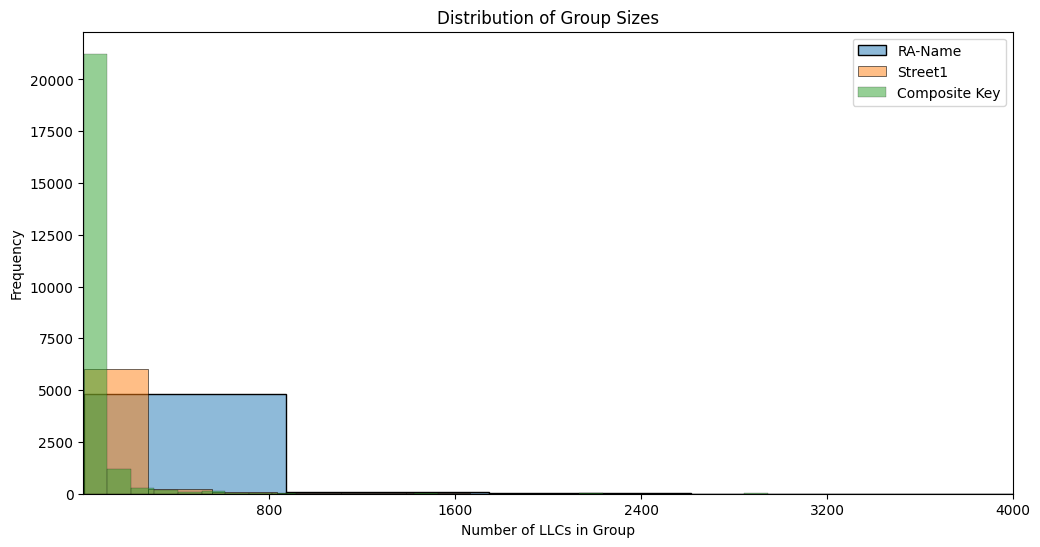

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(12, 6))
sns.histplot(ra_groups['LLC_Count'], bins=50, label='RA-Name', alpha=0.5)
sns.histplot(address_groups['LLC_Count'], bins=50, label='Street1', alpha=0.5)
sns.histplot(composite_groups['LLC_Count'], bins=50, label='Composite Key', alpha=0.5)

plt.xlabel('Number of LLCs in Group')
plt.ylabel('Frequency')
plt.title('Distribution of Group Sizes')
plt.legend()

plt.xlim(0, 4000) 
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', nbins=5))  # Limit to max 5 ticks

plt.savefig('../OUTPUT/group_size_distribution.png')
plt.show()
plt.close()

Most popular group with these 3 fields is no registered agent at that address represented by solodar (looks to be a law firm in richmond)

In [ ]:
# ra_entities = df.merge(ra_groups[['RA-Name']], on='RA-Name', how='inner')[['Name', 'RA-Name', 'plaintiff_name']]
# address_entities = df.merge(address_groups[['Street1']], on='Street1', how='inner')[['Name', 'Street1', 'plaintiff_name']]

# overlap = pd.merge(
#     ra_entities,
#     address_entities,
#     on='Name',
#     how='inner',
#     suffixes=('_ra', '_addr')
# )
# print("\nNumber of overlapping LLCs (RA-Name and Street1):", len(overlap))
# print("Sample overlapping LLCs (first 5):")
# print(overlap[['Name', 'RA-Name', 'Street1', 'plaintiff_name_ra']].head(5))

Some quick statistics

In [ ]:
print("\n=== Composite Key Group Statistics ===")
print(f"Number of combinations with multiple LLCs: {len(composite_groups)}")
print(f"Largest composite network has {composite_groups['LLC_Count'].max()} LLCs")
print(f"Average LLCs per composite key: {composite_groups['LLC_Count'].mean():.2f}")
print(f"Median LLCs per composite key: {composite_groups['LLC_Count'].median():.2f}")
print(f"Total LLCs in composite networks: {composite_groups['LLC_Count'].sum()}")


=== RA Group Statistics ===
Number of RAs with multiple LLCs: 5058
Largest RA network has 38404 LLCs
Average LLCs per RA: 117.94
Median LLCs per RA: 6.00
Total LLCs in RA networks: 596525

=== Address Group Statistics ===
Number of addresses with multiple LLCs: 6627
Largest address network has 12839 LLCs
Average LLCs per address: 94.56
Median LLCs per address: 7.00
Total LLCs in address networks: 626637

=== Composite Key Group Statistics ===
Number of RA-Address combinations with multiple LLCs: 6756
Largest composite network has 12839 LLCs
Average LLCs per composite key: 88.16
Median LLCs per composite key: 7.00
Total LLCs in composite networks: 595614


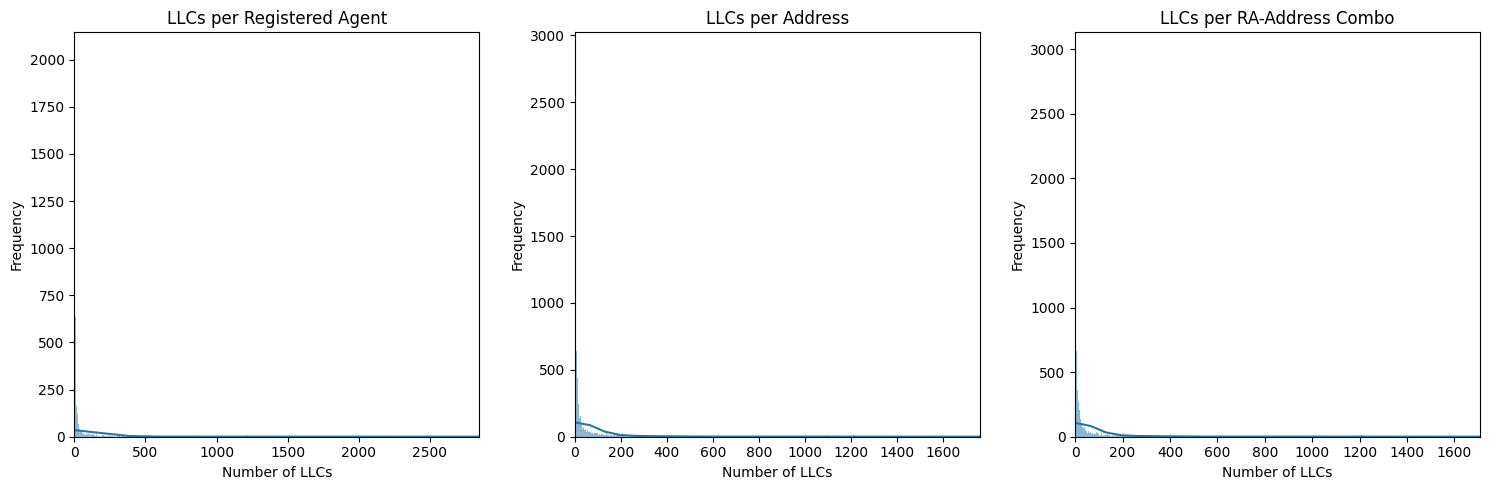

In [ ]:
ra_xlim = ra_groups['LLC_Count'].quantile(0.99)
address_xlim = address_groups['LLC_Count'].quantile(0.99)
composite_xlim = composite_groups['LLC_Count'].quantile(0.99)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(ra_groups['LLC_Count'], kde=True)
plt.title('LLCs per Registered Agent')
plt.xlabel('Number of LLCs')
plt.ylabel('Frequency')
plt.xlim(0, ra_xlim)

plt.subplot(1, 3, 2)
sns.histplot(address_groups['LLC_Count'], kde=True)
plt.title('LLCs per Address')
plt.xlabel('Number of LLCs')
plt.ylabel('Frequency')
plt.xlim(0, address_xlim)

plt.subplot(1, 3, 3)
sns.histplot(composite_groups['LLC_Count'], kde=True)
plt.title('LLCs per RA-Address Combo')
plt.xlabel('Number of LLCs')
plt.ylabel('Frequency')
plt.xlim(0, composite_xlim)

plt.tight_layout()
plt.savefig('../OUTPUT/network_size_distributions.png')
plt.show()
plt.close()


=== LLC Network Size Statistics ===
Total networks identified: 6756
Average LLCs per network: 88.16
Median LLCs per network: 7.0
Largest network size: 12839.0


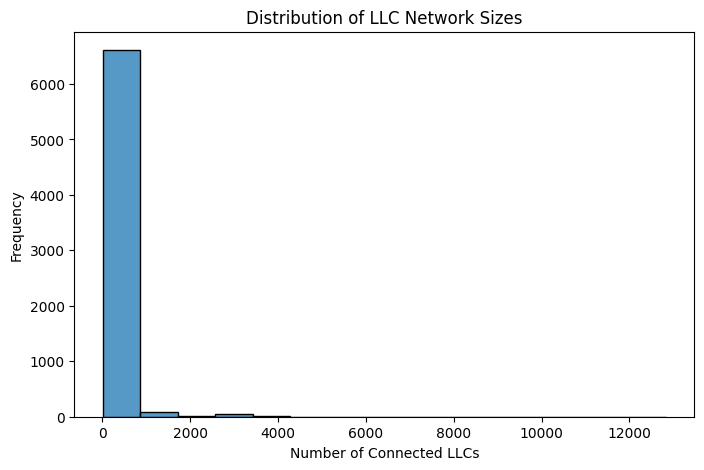

In [ ]:
network_size_stats = composite_groups['LLC_Count'].describe()
print("=== LLC Network Size Statistics ===")
print(f"Total networks identified: {len(composite_groups)}")
print(f"Average LLCs per network: {network_size_stats['mean']:.2f}")
print(f"Median LLCs per network: {network_size_stats['50%']:.1f}")
print(f"Largest network size: {network_size_stats['max']}")

plt.figure(figsize=(8, 5))
sns.histplot(composite_groups['LLC_Count'], bins=15)
plt.title('Distribution of LLC Network Sizes')
plt.xlabel('Number of Connected LLCs')
plt.ylabel('Frequency')
plt.savefig('../OUTPUT/network_sizes.png')


=== LLC Formation Timeline Analysis ===
Average timespan of LLC formations within networks: 130.3 days
Median formation timespan: 0.0 days
Networks with rapid LLC formation (≤30 days): 6215 (92.0%)


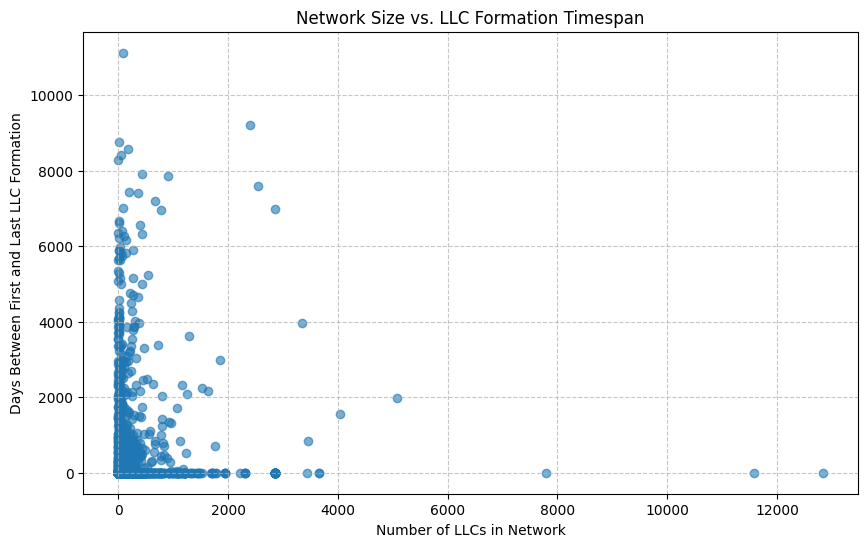

In [ ]:
print("\n=== LLC Formation Timeline Analysis ===")
formation_stats = composite_groups['Timespan_Days'].describe()
print(f"Average timespan of LLC formations within networks: {formation_stats['mean']:.1f} days")
print(f"Median formation timespan: {formation_stats['50%']:.1f} days")

# Count networks with rapid LLC formation (within 30 days)
rapid_formation = composite_groups[composite_groups['Timespan_Days'] <= 30]
print(f"Networks with rapid LLC formation (≤30 days): {len(rapid_formation)} ({len(rapid_formation)/len(composite_groups):.1%})")

plt.figure(figsize=(10, 6))
plt.scatter(composite_groups['LLC_Count'], composite_groups['Timespan_Days'], alpha=0.6)
plt.title('Network Size vs. LLC Formation Timespan')
plt.xlabel('Number of LLCs in Network')
plt.ylabel('Days Between First and Last LLC Formation')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('../OUTPUT/formation_timespan_scatter.png')


=== Serial Filing Analysis ===
Average serial filer percentage within networks: 20.9%
Networks with 100% serial filers: 62
Networks with >75% serial filers: 139


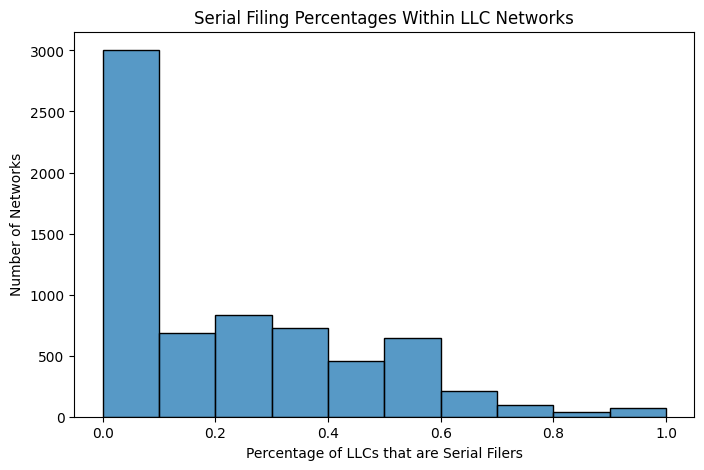

In [ ]:
# Analysis of serial filing within networks
print("\n=== Serial Filing Analysis ===")
print(f"Average serial filer percentage within networks: {composite_groups['Serial_Filer_Pct'].mean():.1%}")
print(f"Networks with 100% serial filers: {len(composite_groups[composite_groups['Serial_Filer_Pct'] == 1])}")
print(f"Networks with >75% serial filers: {len(composite_groups[composite_groups['Serial_Filer_Pct'] > 0.75])}")

# Quick histogram of serial filing percentages
plt.figure(figsize=(8, 5))
sns.histplot(composite_groups['Serial_Filer_Pct'], bins=10)
plt.title('Serial Filing Percentages Within LLC Networks')
plt.xlabel('Percentage of LLCs that are Serial Filers')
plt.ylabel('Number of Networks')
plt.savefig('../OUTPUT/serial_filing_hist.png')

In [ ]:
# Analyze filing timespans - how long networks are active in filings
print("\n=== Eviction Filing Timeline Analysis ===")
filing_stats = composite_groups['Filing_Timespan_Days'].describe()
print(f"Average active filing period: {filing_stats['mean']:.1f} days")
print(f"Median active filing period: {filing_stats['50%']:.1f} days")
print(f"Longest active filing period: {filing_stats['max']:.1f} days")

# Calculate filing density (filings per day)
composite_groups['Filing_Density'] = composite_groups['LLC_Count'] / (composite_groups['Filing_Timespan_Days'] + 1)  # +1 to avoid division by zero
print(f"Average filing density: {composite_groups['Filing_Density'].mean():.2f} filings per day")
print(f"Maximum filing density: {composite_groups['Filing_Density'].max():.2f} filings per day")


=== Eviction Filing Timeline Analysis ===
Average active filing period: 1073.4 days
Median active filing period: 1021.0 days
Longest active filing period: 2186.0 days
Average filing density: 0.20 filings per day
Maximum filing density: 23.00 filings per day


In [ ]:
# Examine the largest networks in detail
print("\n=== Top 5 Largest LLC Networks ===")
for idx, row in large_networks.head(5).iterrows():
    ra, addr = row['Composite_Key'].split('|')
    print(f"\nNetwork #{idx+1}: {row['LLC_Count']} LLCs")
    print(f"RA: {ra}, Address: {addr}")
    print(f"LLCs formed over {row['Timespan_Days']} days")
    print(f"Active filing period: {row['Filing_Timespan_Days']} days")
    print(f"Serial filer percentage: {row['Serial_Filer_Pct']:.1%}")
    print(f"Sample LLCs: {', '.join(row['plaintiff_name'][:3])}")


=== Top 5 Largest LLC Networks ===

Network #364: 12839 LLCs
RA: ARVIND B   AMIN, Address: 208 GOLDEN MAPLE DR
LLCs formed over 0 days
Active filing period: 2179 days
Serial filer percentage: 55.8%
Sample LLCs: 319 WINSTON ASSOCIATES LLC SUCC IN INT TO, 319 WINSTON ASSOCIATES LLC SUCC IN INT TO, 319 WINSTON ASSOCIATES LLC SUCC IN INT TO

Network #3993: 11586 LLCs
RA: HORACE   JONES, Address: 1555 KING ST STE 200
LLCs formed over 0 days
Active filing period: 2179 days
Serial filer percentage: 50.9%
Sample LLCs: 1 SQ APTS LP, 1 SQ APTS LP, 1 SQ APTS LP

Network #9381: 7786 LLCs
RA: THAO NHU   DINH, Address: 7704-C RICHMOND HWY
LLCs formed over 0 days
Active filing period: 2184 days
Serial filer percentage: 34.8%
Sample LLCs: ARUNDINA LLC, COG AND JOB HOLDINGS LLC, JK PROPERTY HOLDINGS LP

Network #4114: 5077 LLCs
RA: ICAFS  INC., Address: 2922 Hathaway Road
LLCs formed over 1968 days
Active filing period: 2158 days
Serial filer percentage: 64.4%
Sample LLCs: CHVA LLC, CHVA LLC, CHVA LLC


=== Formation to Filing Timeline Analysis ===
Average days from network formation to first filing: 2338.4
Networks filing evictions within 30 days of formation: 967


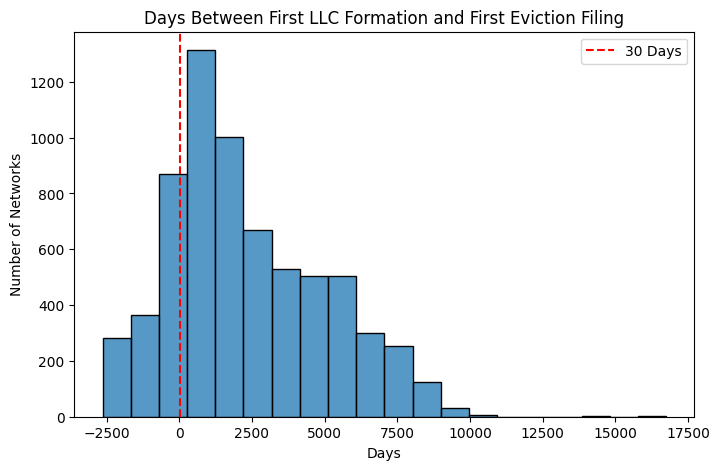

In [ ]:
# Calculate time between LLC formation and first filing
composite_groups['Avg_Days_To_First_Filing'] = composite_groups.apply(
    lambda row: (min(row['FilingDate_Parsed']) - min(row['IncorpDate_Parsed'])).days 
    if len(row['FilingDate_Parsed']) > 0 and len(row['IncorpDate_Parsed']) > 0 
    else np.nan, axis=1
)

print("\n=== Formation to Filing Timeline Analysis ===")
print(f"Average days from network formation to first filing: {composite_groups['Avg_Days_To_First_Filing'].mean():.1f}")
print(f"Networks filing evictions within 30 days of formation: {len(composite_groups[composite_groups['Avg_Days_To_First_Filing'] <= 30])}")

# Quick histogram
plt.figure(figsize=(8, 5))
sns.histplot(composite_groups['Avg_Days_To_First_Filing'].dropna(), bins=20)
plt.title('Days Between First LLC Formation and First Eviction Filing')
plt.xlabel('Days')
plt.ylabel('Number of Networks')
plt.axvline(x=30, color='r', linestyle='--', label='30 Days')
plt.legend()
plt.savefig('../OUTPUT/formation_to_filing_hist.png')